# Modelling (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [146]:
df = pd.read_csv("covtype_clean_v2.csv").sample(10000)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type4,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9
542862,3157,178,19,3284,225,247,666,2,61956,1762,...,0,0,0,0,0,0,0,0,0,0
339679,2540,314,26,789,144,210,1209,2,155921,575,...,0,0,0,0,0,0,0,0,0,0
457237,3355,341,11,3369,196,223,3320,7,184724,1893,...,0,0,0,0,0,0,0,0,0,0
108387,3139,67,12,3656,232,216,3726,1,180452,2040,...,0,0,0,0,0,0,0,0,0,0
173822,2889,94,20,1211,247,205,1655,2,1021,620,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df.shape

(10000, 55)

In [148]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

### Standarization

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# ``1.XGBoost Classifer``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [152]:
xgb= XGBClassifier()
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
y_pred = xgb.predict(X_test)

**Evaluate the performance**

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.78      0.79      1106
           2       0.81      0.86      0.83      1470
           3       0.74      0.87      0.80       170
           4       1.00      0.58      0.73        19
           5       0.80      0.17      0.29        46
           6       0.75      0.49      0.59        95
           7       0.87      0.65      0.74        94

    accuracy                           0.80      3000
   macro avg       0.82      0.63      0.68      3000
weighted avg       0.80      0.80      0.80      3000



In [155]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='macro')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score)

xgb_accuracy: 0.8013333333333333 
xgb_f1_score: 0.6827958152318926


**Tunning XGBOOST**

In [156]:
xgb_params = {"n_estimators": [50,300,500],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,9,17],
             "learning_rate":[0.1,0.01,0.3]}

In [157]:
# xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [158]:
# xgb_grid.best_params_

In [159]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 15, 
                                n_estimators= 200, 
                                subsample= 0.7).fit(X_train, y_train)

In [160]:
y_pred = xgb_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.80      0.81      1106
           2       0.83      0.87      0.85      1470
           3       0.74      0.86      0.80       170
           4       0.92      0.58      0.71        19
           5       0.76      0.28      0.41        46
           6       0.72      0.51      0.59        95
           7       0.89      0.69      0.78        94

    accuracy                           0.82      3000
   macro avg       0.81      0.66      0.71      3000
weighted avg       0.82      0.82      0.81      3000



In [161]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='macro')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score)

xgb_accuracy: 0.8176666666666667 
xgb_f1_score: 0.7073061603990255


**Visualization of Confusion Matrix with Table**

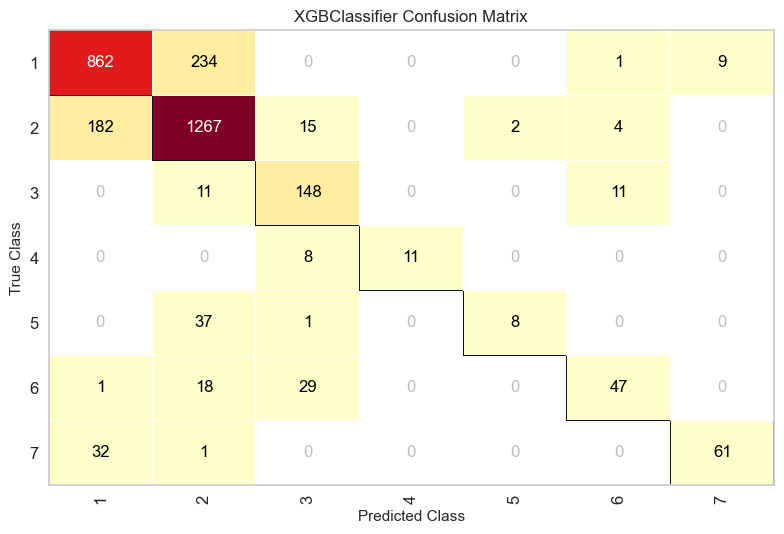

In [162]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

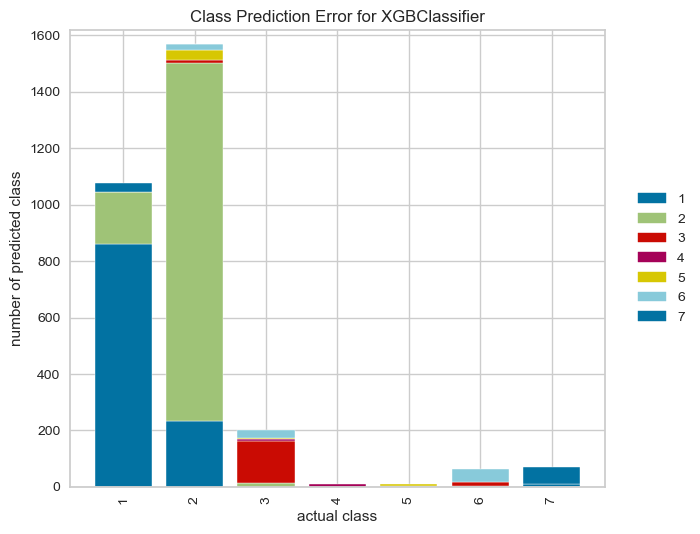

In [163]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``2.Random Forest Classifier``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [164]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [165]:
y_pred = rfc.predict(X_test)

**Evaluate the performance**

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.79      0.80      1106
           2       0.81      0.87      0.84      1470
           3       0.69      0.88      0.77       170
           4       0.89      0.42      0.57        19
           5       0.89      0.17      0.29        46
           6       0.69      0.42      0.52        95
           7       0.98      0.66      0.79        94

    accuracy                           0.80      3000
   macro avg       0.82      0.60      0.66      3000
weighted avg       0.81      0.80      0.80      3000



In [167]:
rfc_accuracy = rfc.score(X_test,y_test)
rfc_f1_score = f1_score(y_test, y_pred, average='macro')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score)

rfc_accuracy: 0.8046666666666666 
rfc_f1_score: 0.655350289618322


**RF Tunning**

In [168]:
rfc_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [169]:
# rfc_grid = GridSearchCV(rfc, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [170]:
# rfc_grid.best_params_

In [171]:
rfc_tuned = RandomForestClassifier(max_depth = 7,             
                                  max_features = 8, 
                                  min_samples_split = 2, 
                                  n_estimators = 1000).fit(X_train, y_train)

In [172]:
y_pred = rfc_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.71      0.70      1106
           2       0.72      0.80      0.76      1470
           3       0.60      0.69      0.64       170
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        46
           6       0.73      0.08      0.15        95
           7       1.00      0.13      0.23        94

    accuracy                           0.70      3000
   macro avg       0.53      0.35      0.35      3000
weighted avg       0.70      0.70      0.68      3000



* default degerlerle model daha basarili cikti.

**Visualization of Confusion Matrix with Table**

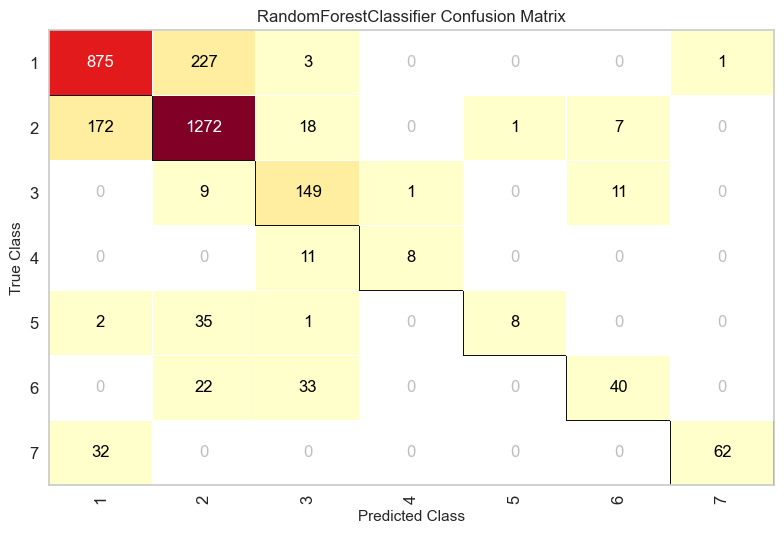

In [173]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rfc)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

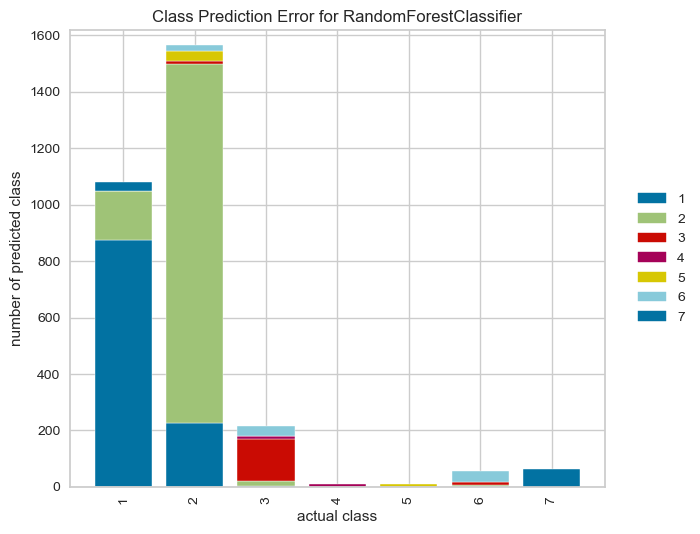

In [174]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``3.KNeighborsClassifer``

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [177]:
y_pred = knn.predict(X_test)

**Visualize Accuracies of Train & Test Data by Different k`s**

In [178]:
neighbors = range(1,8,2) # k nin tek sayi olmasi beklenir.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

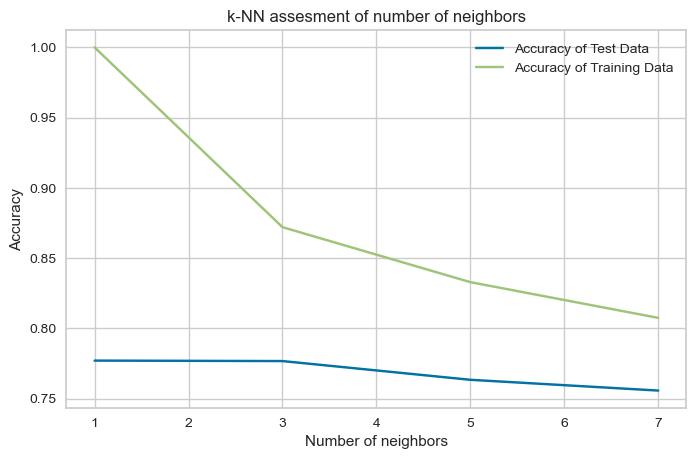

In [179]:
plt.figure(figsize=(8,5))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**Find Optimum K Value with Elbow Method**

In [180]:
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak
# k nin tek sayi olmasi beklenir.
# Will take some time
for i in range(1,8,2):
    
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 
    

print('Optimum K_Value: ',error_rate.index(min(error_rate))+1)

Optimum K_Value:  1


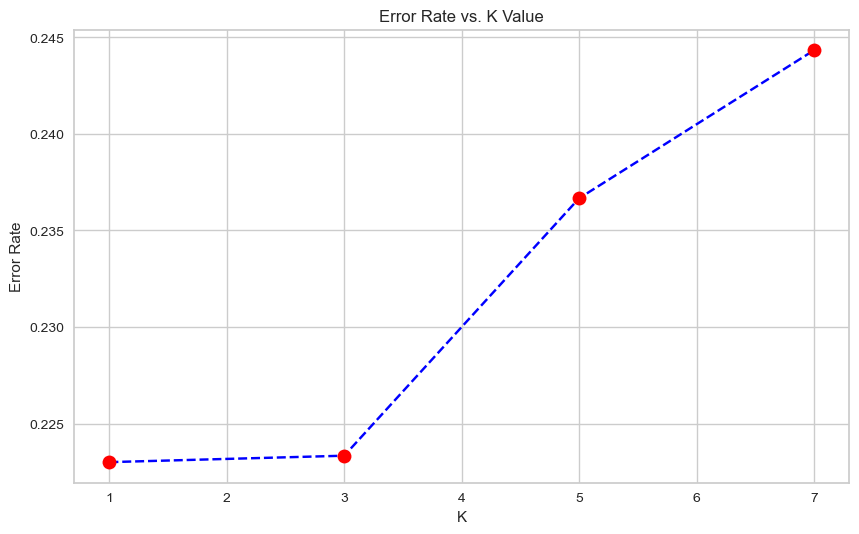

In [181]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8,2),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

**Tunning KNN with GridSearchCV**

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": range(1,8,2)} # k tek sayi olmali

knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [184]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [185]:
knn_tuned= KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

**Evaluate the Performance**

In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.76      0.77      1106
           2       0.81      0.83      0.82      1470
           3       0.68      0.72      0.70       170
           4       0.77      0.53      0.62        19
           5       0.47      0.41      0.44        46
           6       0.56      0.57      0.57        95
           7       0.71      0.72      0.72        94

    accuracy                           0.78      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.78      0.78      0.78      3000



In [187]:
knn_accuracy = knn_tuned.score(X_test,y_test)
knn_f1_score = f1_score(y_test, y_pred, average='macro')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score)

knn_accuracy: 0.777 
knn_f1_score: 0.6627094810067148


**Visualization of Confusion Matrix with Table**

In [188]:
from sklearn.metrics import classification_report,confusion_matrix
# print(*confusion_matrix(y_test,y_pred), sep="\n")

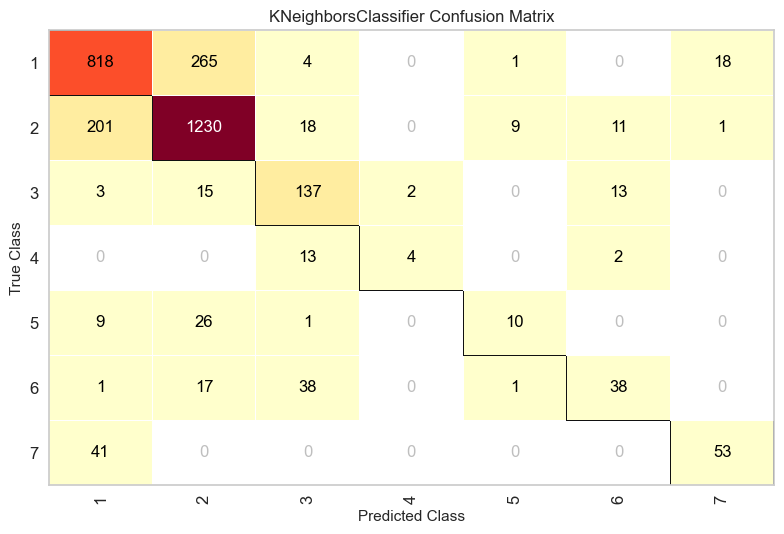

In [189]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

In [190]:
# Alternative
# from sklearn.metrics import classification_report,confusion_matrix
# sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label');

**Visualization of Confusion Matrix with Countplot**

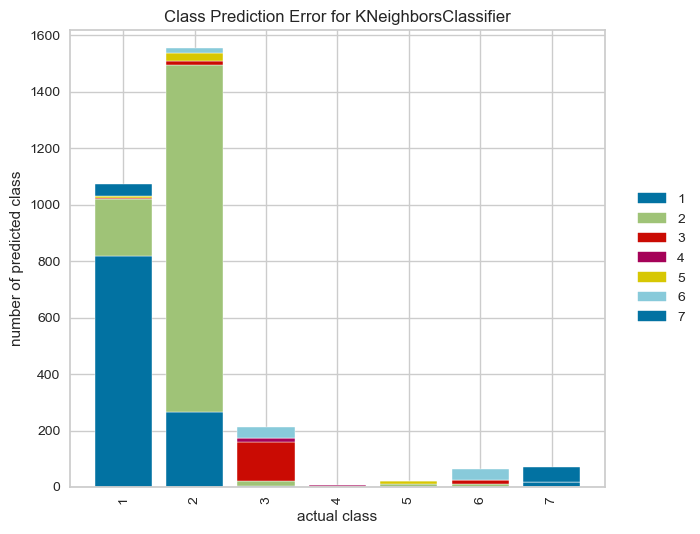

In [191]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(knn)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``4.Decision Tree Classifier``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

**Evaluate the Performance**

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.68      0.69      1106
           2       0.74      0.76      0.75      1470
           3       0.65      0.73      0.69       170
           4       0.74      0.74      0.74        19
           5       0.25      0.26      0.26        46
           6       0.56      0.47      0.51        95
           7       0.58      0.68      0.63        94

    accuracy                           0.71      3000
   macro avg       0.61      0.62      0.61      3000
weighted avg       0.71      0.71      0.71      3000



In [195]:
dt_accuracy = dt.score(X_test,y_test)
dt_f1_score = f1_score(y_test, y_pred, average='macro')
print('dt_accuracy:',dt_accuracy,
      '\ndt_f1_score:',dt_f1_score)

dt_accuracy: 0.7076666666666667 
dt_f1_score: 0.6096548261964324


**Visualization of Confusion Matrix with Table**

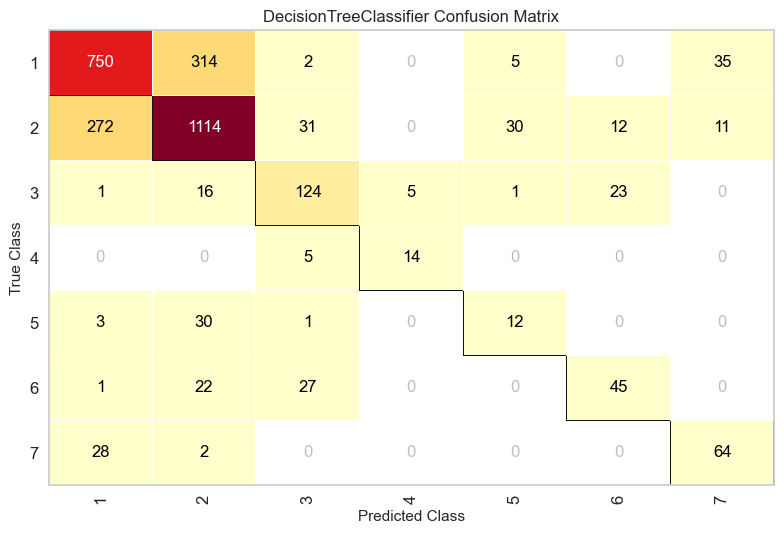

In [196]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dt)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

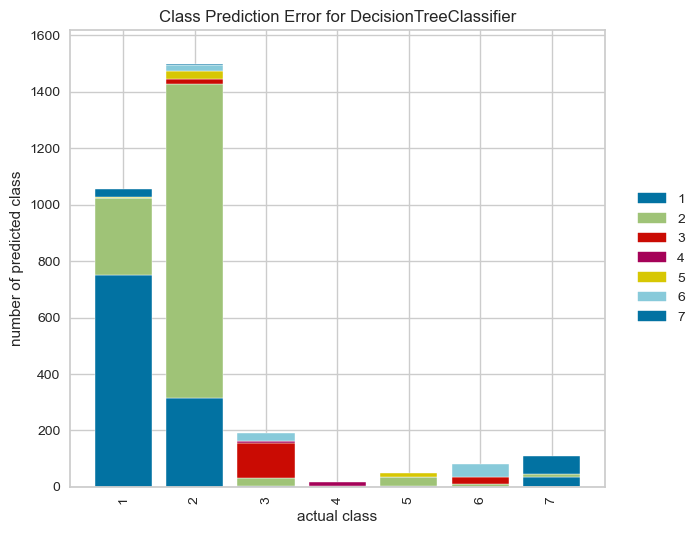

In [197]:
visualizer = ClassPredictionError(dt)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``5. Support Vector Machine``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [198]:
from sklearn.svm import SVC

In [199]:
svm = SVC()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

**Evaluate the Performance**

In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.71      0.73      1106
           2       0.76      0.82      0.78      1470
           3       0.58      0.94      0.72       170
           4       0.50      0.11      0.17        19
           5       0.00      0.00      0.00        46
           6       0.53      0.09      0.16        95
           7       0.74      0.55      0.63        94

    accuracy                           0.73      3000
   macro avg       0.55      0.46      0.46      3000
weighted avg       0.72      0.73      0.72      3000



In [201]:
svm_accuracy = svm.score(X_test,y_test)
svm_f1_score = f1_score(y_test, y_pred, average='macro')
svm_accuracy, svm_f1_score
print('svm_accuracy:',svm_accuracy,
      '\nsvm_f1_score:',svm_f1_score)

svm_accuracy: 0.7343333333333333 
svm_f1_score: 0.4567095406181907


**Visualization of Confusion Matrix with Table**

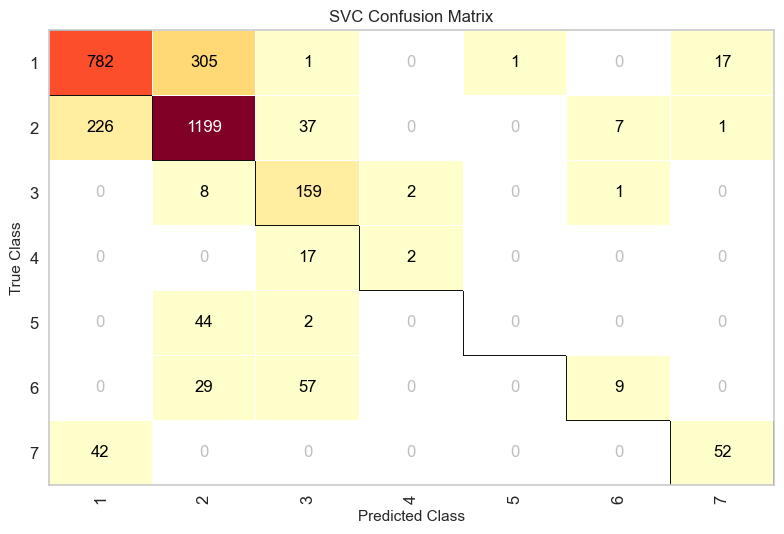

In [202]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(svm)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

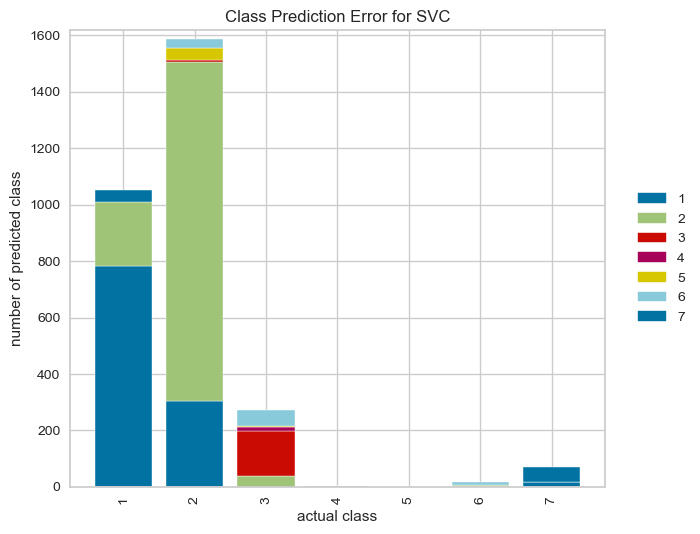

In [203]:
visualizer = ClassPredictionError(svm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

**Visualization of Classification Report**

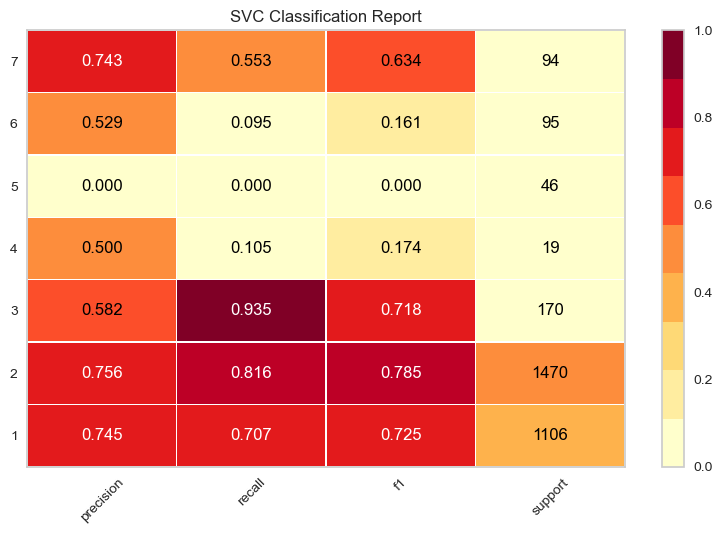

In [204]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

**Tunning SVM**

* if C=1, soft margin
* if C=1000, hard margin
* C, margine yakinlik veya uzakligina gore ceza verir.
* Gamma buyurse daha kompleks siniflandirici haline gelir ve overfitinge gidebilir.
* rbf kullanilacaksa C ve Gamma optimize edilmelidir. Ozellikle Gamma !
* Gamma buyukse, C onemsiz hale gelir.
* 0.0001 < Gamma < 10  
* 0.1 < C < 100

In [205]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']} 

In [206]:
# grid_svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# grid_svc.fit(X_train,y_train)
# grid_svc.best_params_

In [207]:
# y_pred = grid_svc.predict(X_test)
# print(classification_report(y_test, y_pred))

# ``Accuracy Comparison``

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

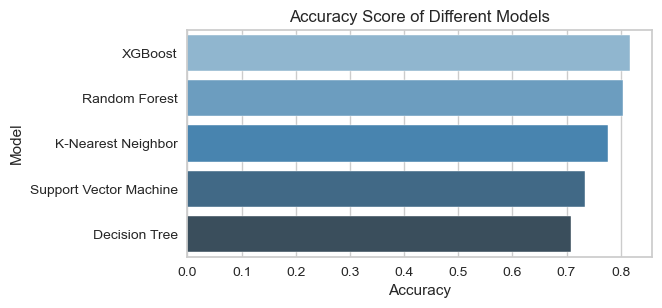

In [208]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree",'Support Vector Machine'],
                        "Accuracy": [knn_accuracy, rfc_accuracy, xgb_accuracy, dt_accuracy, svm_accuracy]})

compare = compare.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(6,3))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title("Accuracy Score of Different Models", size=12);

# ``F1 Score Comparison``

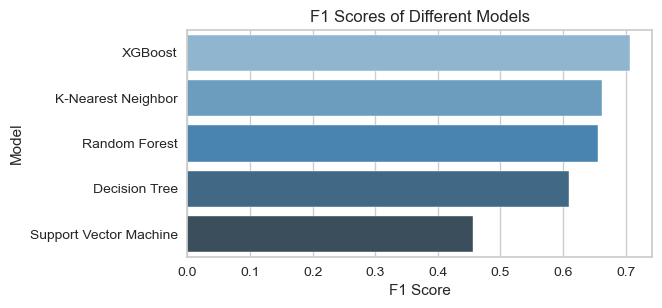

In [209]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree", 'Support Vector Machine'],
                        "F1 Score": [knn_f1_score, rfc_f1_score, xgb_f1_score, dt_f1_score, svm_f1_score]})
 
compare = compare.sort_values(by="F1 Score", ascending=False)

plt.figure(figsize=(6,3))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title("F1 Scores of Different Models", size=12);